<a href="https://colab.research.google.com/github/codewithpradeep14/Minor_course_projects_and_labs/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTATION OF RNN USING PYTORCH**

In [ ]:
pip install pandas torch scikit-learn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# Load and Preprocess the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

# Convert month and day to numerical values
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                                'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['day'] = df['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})

# Select features and target variable
X = df.drop('area', axis=1).values
y = df['area'].values

# Log-transform the target variable to handle the skewness
y = np.log1p(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class ForestFiresDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ForestFiresDataset(X_train, y_train)
test_dataset = ForestFiresDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Define the RNN Model

In [ ]:
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1

model = RNNModel(input_size, hidden_size, num_layers, output_size).to('cpu')


# Train the Model

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)  # Adding sequence dimension
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 3.6326
Epoch [2/50], Loss: 1.3252
Epoch [3/50], Loss: 2.7307
Epoch [4/50], Loss: 1.7243
Epoch [5/50], Loss: 1.7464
Epoch [6/50], Loss: 1.7743
Epoch [7/50], Loss: 1.6192
Epoch [8/50], Loss: 2.8369
Epoch [9/50], Loss: 2.7286
Epoch [10/50], Loss: 2.1590
Epoch [11/50], Loss: 1.7381
Epoch [12/50], Loss: 2.4311
Epoch [13/50], Loss: 1.3610
Epoch [14/50], Loss: 3.2014
Epoch [15/50], Loss: 2.5150
Epoch [16/50], Loss: 1.1382
Epoch [17/50], Loss: 1.4424
Epoch [18/50], Loss: 2.4077
Epoch [19/50], Loss: 2.5130
Epoch [20/50], Loss: 1.9961
Epoch [21/50], Loss: 1.6529
Epoch [22/50], Loss: 1.4785
Epoch [23/50], Loss: 1.6925
Epoch [24/50], Loss: 1.7347
Epoch [25/50], Loss: 1.9164
Epoch [26/50], Loss: 1.2636
Epoch [27/50], Loss: 1.8770
Epoch [28/50], Loss: 3.7669
Epoch [29/50], Loss: 1.4170
Epoch [30/50], Loss: 1.7831
Epoch [31/50], Loss: 1.5796
Epoch [32/50], Loss: 1.7970
Epoch [33/50], Loss: 1.8635
Epoch [34/50], Loss: 1.6081
Epoch [35/50], Loss: 0.9542
Epoch [36/50], Loss: 1.6893
E

# Evaluate and Visualise the  data

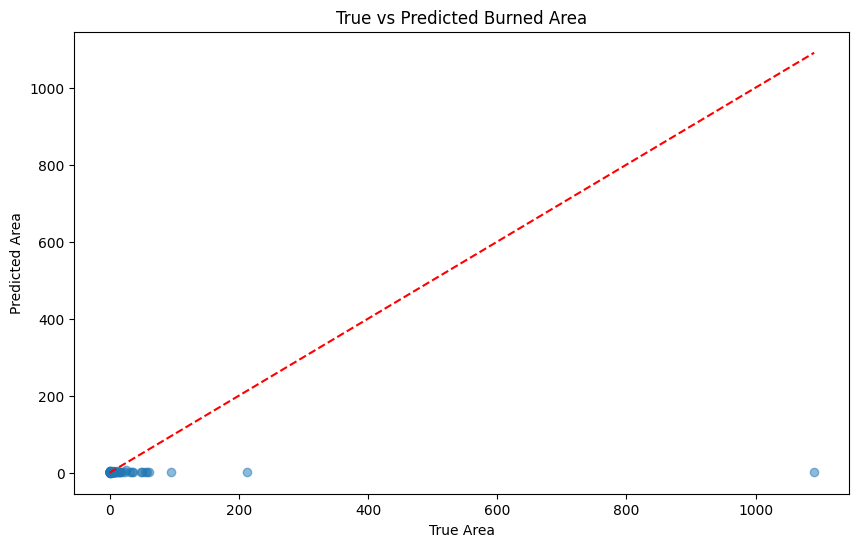

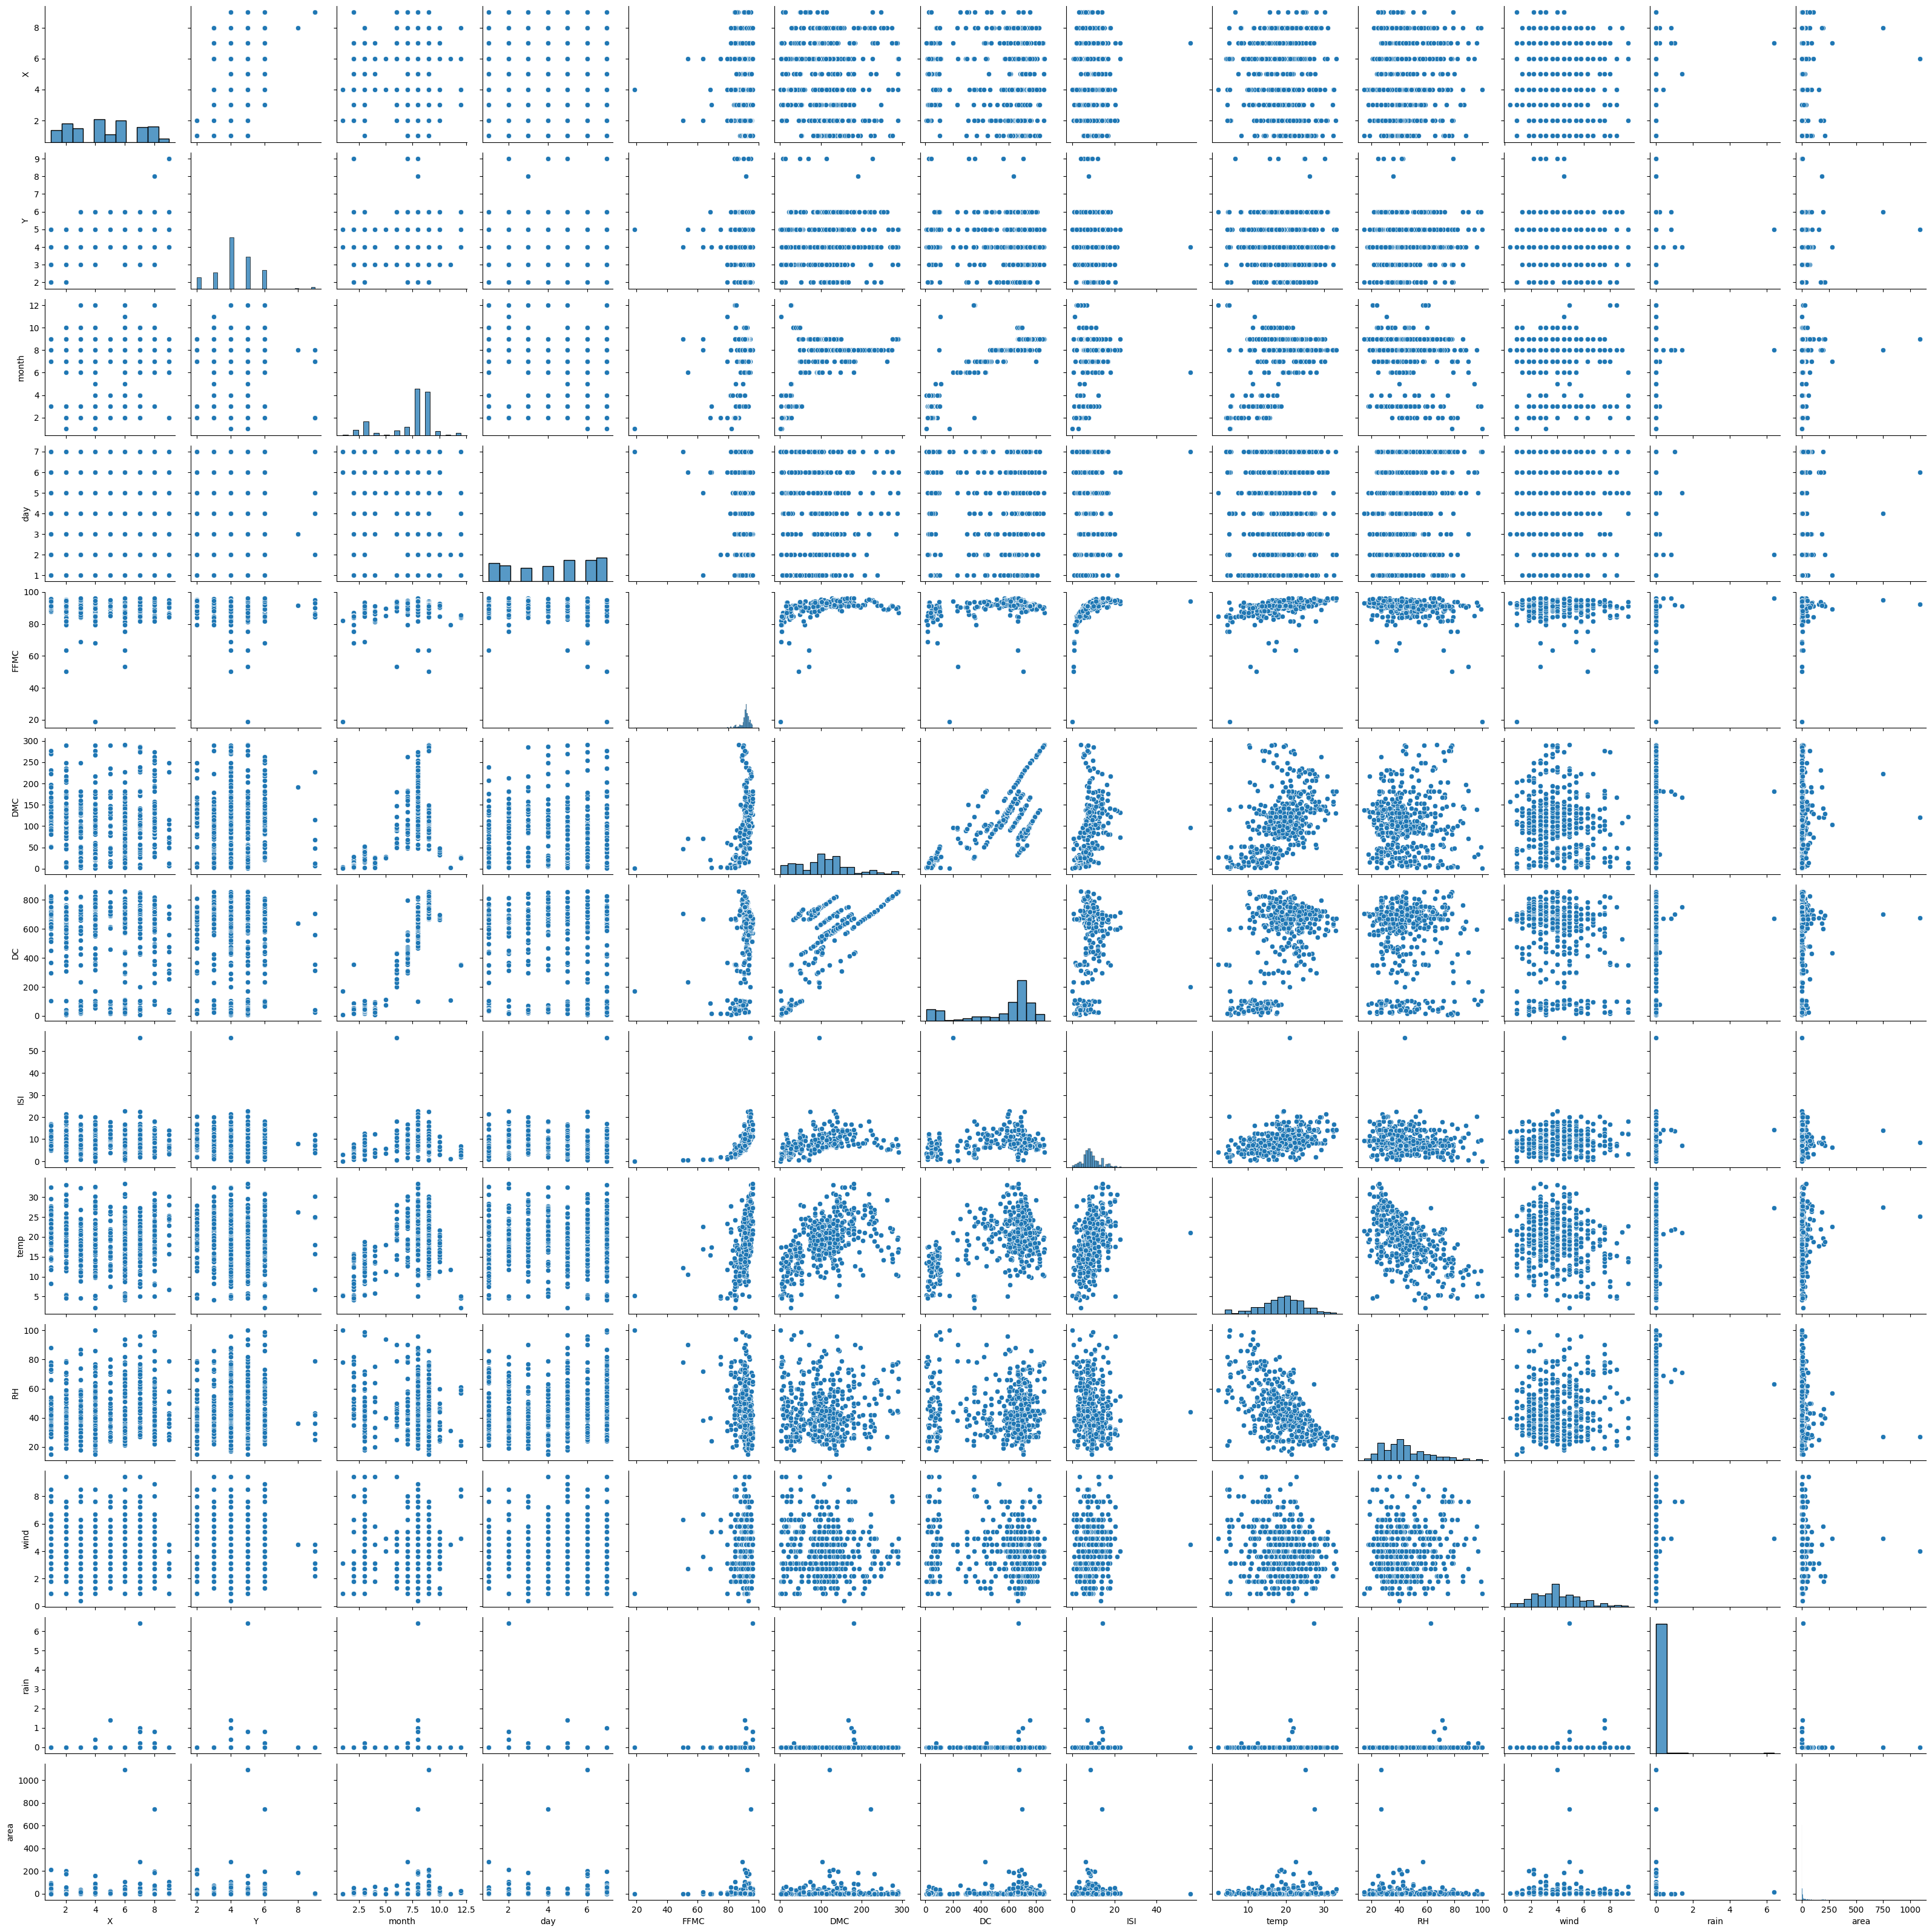

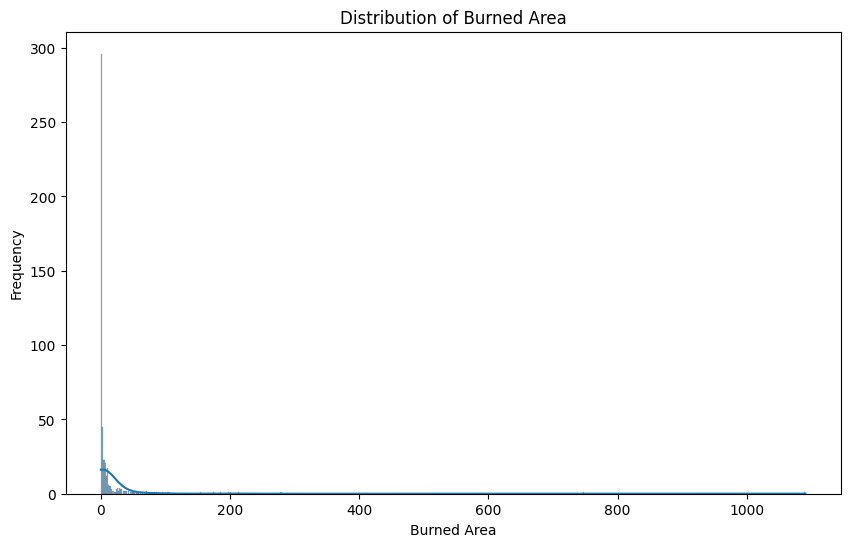

In [ ]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Adding sequence dimension
        outputs = model(X_batch)
        y_pred.extend(outputs.squeeze().numpy())
        y_true.extend(y_batch.numpy())

# Transform predictions back to original scale
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_true)

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel('True Area')
plt.ylabel('Predicted Area')
plt.title('True vs Predicted Burned Area')
plt.show()

# Pairplot of the features
sns.pairplot(df)
plt.show()

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], kde=True)
plt.xlabel('Burned Area')
plt.ylabel('Frequency')
plt.title('Distribution of Burned Area')
plt.show()